# Samrat Baral
# MSCS634 - Advanced Big Data and Data Mining
# Lab Assignment: Data Collection, Visualization, and Analysis


In [1]:
# Install and import libraries
!pip install pandas matplotlib seaborn numpy --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load sample dataset (you can replace this with your own CSV)
# Sales dataset from seaborn
df = sns.load_dataset('tips')

# # Load the 'flights' dataset from Seaborn
# df = sns.load_dataset('flights')

# Display first 5 rows
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Step 2: Data Visualization

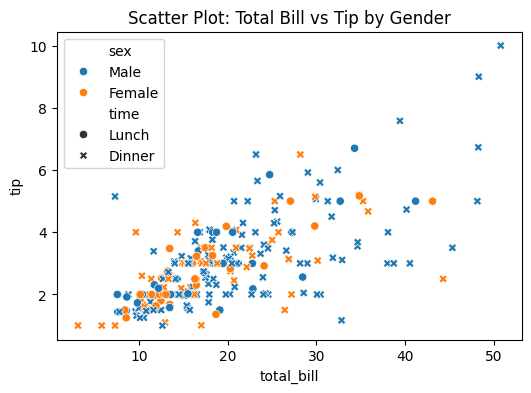

In [3]:
# Scatter Plot: relationship between total_bill and tip
plt.figure(figsize=(6,4))
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', style='time')
plt.title("Scatter Plot: Total Bill vs Tip by Gender")
plt.show()


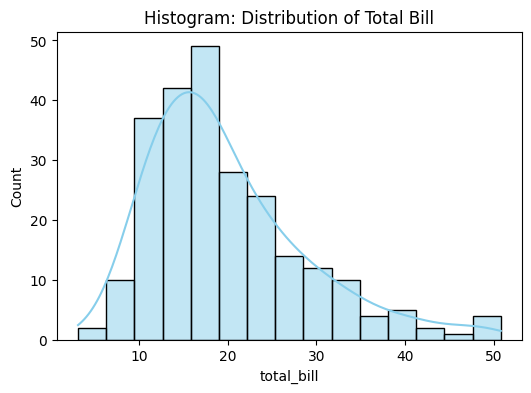

In [4]:
# Histogram: Distribution of Total Bill
plt.figure(figsize=(6,4))
sns.histplot(df['total_bill'], bins=15, kde=True, color='skyblue')
plt.title("Histogram: Distribution of Total Bill")
plt.show()


Step 3: Data Preprocessing


Handling Missing Values

In [5]:
# Check missing values
df.isnull().sum()


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [6]:
# Fill missing values (if any)
df_filled = df.fillna(df.mean(numeric_only=True))
print("After handling missing values:")
df_filled.head()


After handling missing values:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Outlier Detection and Removal

In [7]:
# IQR Method for detecting outliers in 'total_bill'
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"IQR = {IQR:.2f}, Lower = {lower:.2f}, Upper = {upper:.2f}")

outliers = df[(df['total_bill'] < lower) | (df['total_bill'] > upper)]
print(f"Outliers detected: {len(outliers)} rows")

# Remove outliers
df_no_outlier = df[(df['total_bill'] >= lower) & (df['total_bill'] <= upper)]
df_no_outlier.head()


IQR = 10.78, Lower = -2.82, Upper = 40.30
Outliers detected: 9 rows


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Data Reduction

In [8]:
# Reduce dataset size by sampling 70% of data
df_sampled = df_no_outlier.sample(frac=0.7, random_state=42)

# Drop less relevant columns
df_reduced = df_sampled.drop(columns=['sex', 'day'])
print("Data after reduction:")
df_reduced.head()


Data after reduction:


,total_bill,tip,smoker,time,size
70,12.02,1.97,No,Dinner,2
216,28.15,3.00,Yes,Dinner,5
187,30.46,2.00,Yes,Dinner,5
9,14.78,3.23,No,Dinner,2
129,22.82,2.18,No,Lunch,3


Data Scaling and Discretization

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_reduced[['total_bill', 'tip']] = scaler.fit_transform(df_reduced[['total_bill', 'tip']])

# Discretize total_bill into categories (Low, Medium, High)
df_reduced['bill_category'] = pd.cut(df_reduced['total_bill'],
                                     bins=[0, 0.33, 0.66, 1.0],
                                     labels=['Low', 'Medium', 'High'])

df_reduced.head()


,total_bill,tip,smoker,time,size,bill_category
70,0.241240,0.147416,No,Dinner,2,Low
216,0.676011,0.303951,Yes,Dinner,5,High
187,0.738275,0.151976,Yes,Dinner,5,High
9,0.315633,0.338906,No,Dinner,2,Low
129,0.532345,0.179331,No,Lunch,3,Medium


Step 4: Statistical Analysis

General Overview

In [10]:
df_reduced.info()


<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 70 to 226
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     164 non-null    float64 
 1   tip            164 non-null    float64 
 2   smoker         164 non-null    category
 3   time           164 non-null    category
 4   size           164 non-null    int64   
 5   bill_category  163 non-null    category
dtypes: category(3), float64(2), int64(1)
memory usage: 6.0 KB


In [11]:
df_reduced.describe()



,total_bill,tip,size
count,164.000000,164.000000,164.000000
mean,0.426683,0.293545,2.591463
std,0.205021,0.190287,0.983384
min,0.000000,0.000000,1.000000
25%,0.277022,0.151976,2.000000
50%,0.392722,0.260638,2.000000
75%,0.540364,0.379939,3.000000
max,1.000000,1.000000,6.000000


Central Tendency Measures

In [12]:
mean_val = df_reduced['total_bill'].mean()
median_val = df_reduced['total_bill'].median()
mode_val = df_reduced['total_bill'].mode()[0]
min_val = df_reduced['total_bill'].min()
max_val = df_reduced['total_bill'].max()

print(f"Mean: {mean_val:.3f}")
print(f"Median: {median_val:.3f}")
print(f"Mode: {mode_val:.3f}")
print(f"Min: {min_val:.3f}")
print(f"Max: {max_val:.3f}")


Mean: 0.427
Median: 0.393
Mode: 0.113
Min: 0.000
Max: 1.000


Dispersion Measures

In [13]:
range_val = df_reduced['total_bill'].max() - df_reduced['total_bill'].min()
q1 = df_reduced['total_bill'].quantile(0.25)
q3 = df_reduced['total_bill'].quantile(0.75)
iqr = q3 - q1
variance_val = df_reduced['total_bill'].var()
std_val = df_reduced['total_bill'].std()

print(f"Range: {range_val:.3f}")
print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
print(f"Variance: {variance_val:.3f}, Std Dev: {std_val:.3f}")


Range: 1.000
Q1: 0.277, Q3: 0.540, IQR: 0.263
Variance: 0.042, Std Dev: 0.205


Correlation Analysis


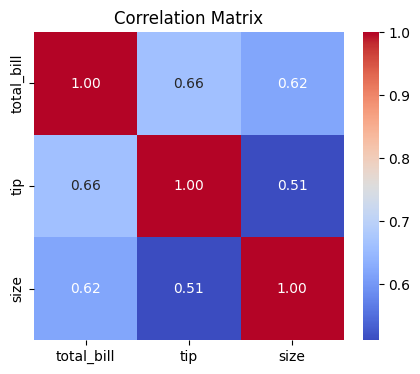

,total_bill,tip,size
total_bill,1.000000,0.660503,0.618359
tip,0.660503,1.000000,0.511422
size,0.618359,0.511422,1.000000


In [15]:
corr_matrix = df_reduced.corr(numeric_only=True)
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

corr_matrix
